## 参考

* 式展開
    * https://www.slideshare.net/KenjiUrai/explanation-of-gpr
* ハイパーパラメータ
    * https://qiita.com/ctgk/items/4c4607edf15072cddc46

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
inv = lambda X: np.linalg.inv(X)

norm = lambda x: np.linalg.norm(x)

def kernel(x, y, a=1, b=1):
    return a*np.exp(-b*0.5*norm(x-y)**2)

def K(X, a=1, b=1):
    N = X.shape[1]
    KM = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            KM[i,j] = kernel(X[:,i],X[:,j],a, b) 
    return KM

def k(X_h, X, a=1, b=1):
    N_h, N = X_h.shape[1], X.shape[1]
    kM = np.zeros((N,N_h))
    for i in range(N):
        for j in range(N_h):
            kM[i,j] = kernel(X_h[:,j], X[:,i],a, b) 
    return kM

def k_(X, a=1, b=1):
    N = X.shape[1]
    kv = np.zeros((N,1))
    for i in range(N):
        kv[i,0] = kernel(X[:,i], X[:,i], a, b)
    return kv

def grad(X, a=1, b=1):
    N = X.shape[1]
    GA, GB = np.zeros((N,N)), np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            diff = norm(X[:,i]-X[:,j])**2
            GA[i,j] = np.exp(-0.5*b*diff)
            GB[i,j] = -0.5*a*b*diff*GA[i,j]
    return GA, GB

update = lambda y, C, G: -0.5*np.trace(C.dot(G))+0.5*y.T.dot(C.dot(G.dot(C.dot(y))))

In [36]:
num = 100
data = np.array([np.linspace(0,2*np.pi,num),np.linspace(0,2*np.pi,num)]).T
target = np.sin(data[:,0])+np.cos(data[:,1])+np.random.rand(len(data))

# 学習用データ
sample = random.sample(range(len(data)),k=len(data))
sample_num = 25
X = data[sample[:sample_num],0:2].T.reshape(2,-1)
y = target[sample[:sample_num]].reshape(-1,1)

[[ 0.93327873]] [[ 0.87025506]]
[[ 0.88517773]] [[ 0.75348321]]
[[ 0.85529766]] [[ 0.6504889]]
[[ 0.84153299]] [[ 0.5616694]]
[[ 0.84080415]] [[ 0.48700293]]
[[ 0.8499503]] [[ 0.42615489]]
[[ 0.86620699]] [[ 0.37855988]]
[[ 0.8871866]] [[ 0.34328526]]
[[ 0.91069402]] [[ 0.31871149]]
[[ 0.93474629]] [[ 0.30246578]]
[[ 0.95782886]] [[ 0.29192768]]
[[ 0.97907832]] [[ 0.2849109]]
[[ 0.99819883]] [[ 0.27995612]]
[[ 1.01523612]] [[ 0.27622046]]
[[ 1.03038284]] [[ 0.27324837]]
[[ 1.04386787]] [[ 0.27079341]]
[[ 1.05590851]] [[ 0.26871509]]
[[ 1.06669521]] [[ 0.26692672]]
[[ 1.07639007]] [[ 0.26537021]]
[[ 1.08512987]] [[ 0.26400397]]
[[ 1.09303017]] [[ 0.26279669]]
[[ 1.10018899]] [[ 0.26172401]]
[[ 1.10669004]] [[ 0.2607665]]
[[ 1.11260524]] [[ 0.25990841]]
[[ 1.11799676]] [[ 0.25913678]]
[[ 1.12291862]] [[ 0.25844079]]
[[ 1.12741804]] [[ 0.25781138]]
[[ 1.1315365]] [[ 0.25724082]]
[[ 1.13531055]] [[ 0.25672254]]
[[ 1.13877258]] [[ 0.25625087]]
[[ 1.14195136]] [[ 0.25582089]]
[[ 1.14487256]]

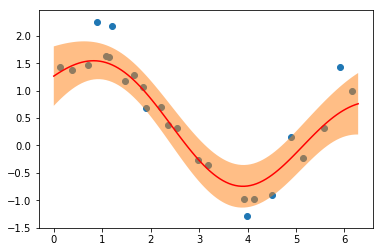

In [37]:
# 予測用データ
X_h = np.array([np.linspace(0,2*np.pi,num),np.linspace(0,2*np.pi,num)])

sg = 1 # yの分散(適当)
a, b = 1, 1 # カーネルのパラメータ(適当)
lr = 0.1 # 学習率(適当)

# 学習
for i in range(50):
    # カーネル計算
    C_M = inv(K(X, a, b)+sg*np.eye(X.shape[1],X.shape[1]))
    k_M = k(X_h, X, a, b)
    k_V = k_(X_h, a, b)
    
    # ハイパーパラメータの更新
    GA, GB = grad(X, a, b)
    a += lr*update(y, C_M, GA)
    b += lr*update(y, C_M, GB)
    print(a, b)
    
# 平均値と分散
yh_mean = k_M.T.dot(C_M).dot(y)
yh_std = np.sqrt(k_V - np.diag(k_M.T.dot(C_M).dot(k_M)).reshape(-1,1))

# plot
plt.plot(X_h[0,:],yh_mean,c="red")
plt.scatter(X[0,:], y)
plt.fill_between(X_h[0,:], (yh_mean-yh_std).reshape(-1,), (yh_mean+yh_std).reshape(-1,), alpha=0.5)